In [1]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic classification data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data


scoring_list = [
            "roc_auc",
            "average_precision",
            "accuracy",
            "recall",
            "precision",
            "f1",
            "neg_log_loss",
            "neg_brier_score",
        ]
select_model = ["LogisticRegression", "KNeighborsClassifier", "SVC", "ExtraTreesClassifier", "AdaBoostClassifier"]

class_data = create_classification_data()
cv_result = ModelValidation.cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    scoring_list=scoring_list,
    select_model=select_model,
    save_csv=False)
from IPython.display import display
display(cv_result)


scoring_list2 = [
            "roc_auc",
            "average_precision",
            "accuracy"]
select_model2 = ["LogisticRegression", "KNeighborsClassifier", "SVC"]
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
report, scoring, method = StatisticalAnalysis.extract_scoring_dfs(report_df=cv_result, scoring_list=scoring_list2, method_list=select_model2, melt=False)
display(report)

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

method             AdaBoostClassifier  ExtraTreesClassifier  \
scoring  cv_cycle                                             
accuracy 1                   0.583333              0.666667   
         2                   0.583333              0.916667   
         3                   0.833333              0.916667   
         4                   0.750000              0.833333   
         5                   0.833333              1.000000   
...                               ...                   ...   
roc_auc  24                  0.722222              0.861111   
         25                  1.000000              0.944444   
         mean                0.828000              0.899000   
         median              0.861000              0.917000   
         std                 0.138000              0.077000   

method             KNeighborsClassifier  LogisticRegression       SVC  
scoring  cv_cycle                                                      
accuracy 1                     0.666667            0.500000  0.750000  
         2                     0.833333            0.666667  0.750000  
         3                     0.916667            0.666667  0.833333  
         4                     0.750000            0.750000  0.750000  
         5                     0.666667            0.833333  1.000000  
...                                 ...                 ...       ...  
roc_auc  24                    0.861111            0.888889  0.944444  
         25                    0.819444            0.666667  0.944444  
         mean                  0.864000            0.764000  0.931000  
         median                0.861000            0.806000  0.944000  
         std                   0.083000            0.121000  0.067000  

[224 rows x 5 columns]

method             KNeighborsClassifier  LogisticRegression       SVC
scoring  cv_cycle                                                    
accuracy 1                     0.666667            0.500000  0.750000
         2                     0.833333            0.666667  0.750000
         3                     0.916667            0.666667  0.833333
         4                     0.750000            0.750000  0.750000
         5                     0.666667            0.833333  1.000000
...                                 ...                 ...       ...
roc_auc  21                    0.777778            0.638889  0.777778
         22                    0.847222            0.722222  1.000000
         23                    1.000000            0.805556  1.000000
         24                    0.861111            0.888889  0.944444
         25                    0.819444            0.666667  0.944444

[75 rows x 3 columns]

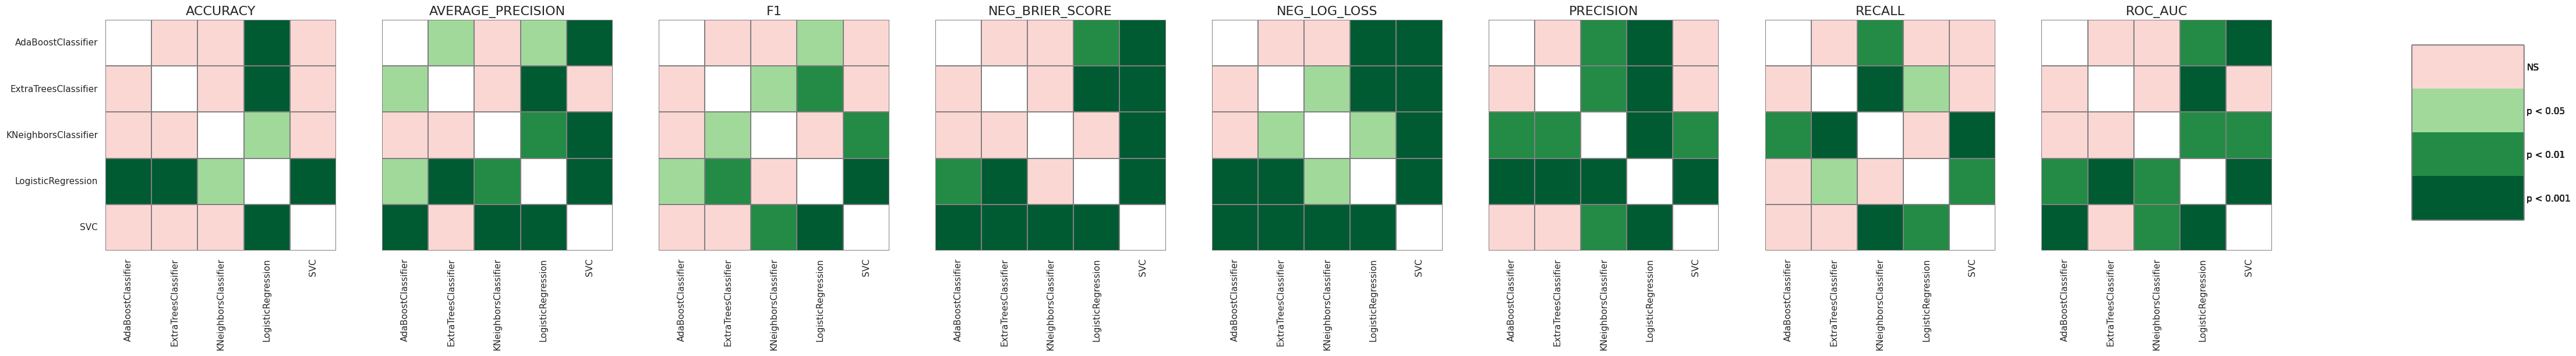

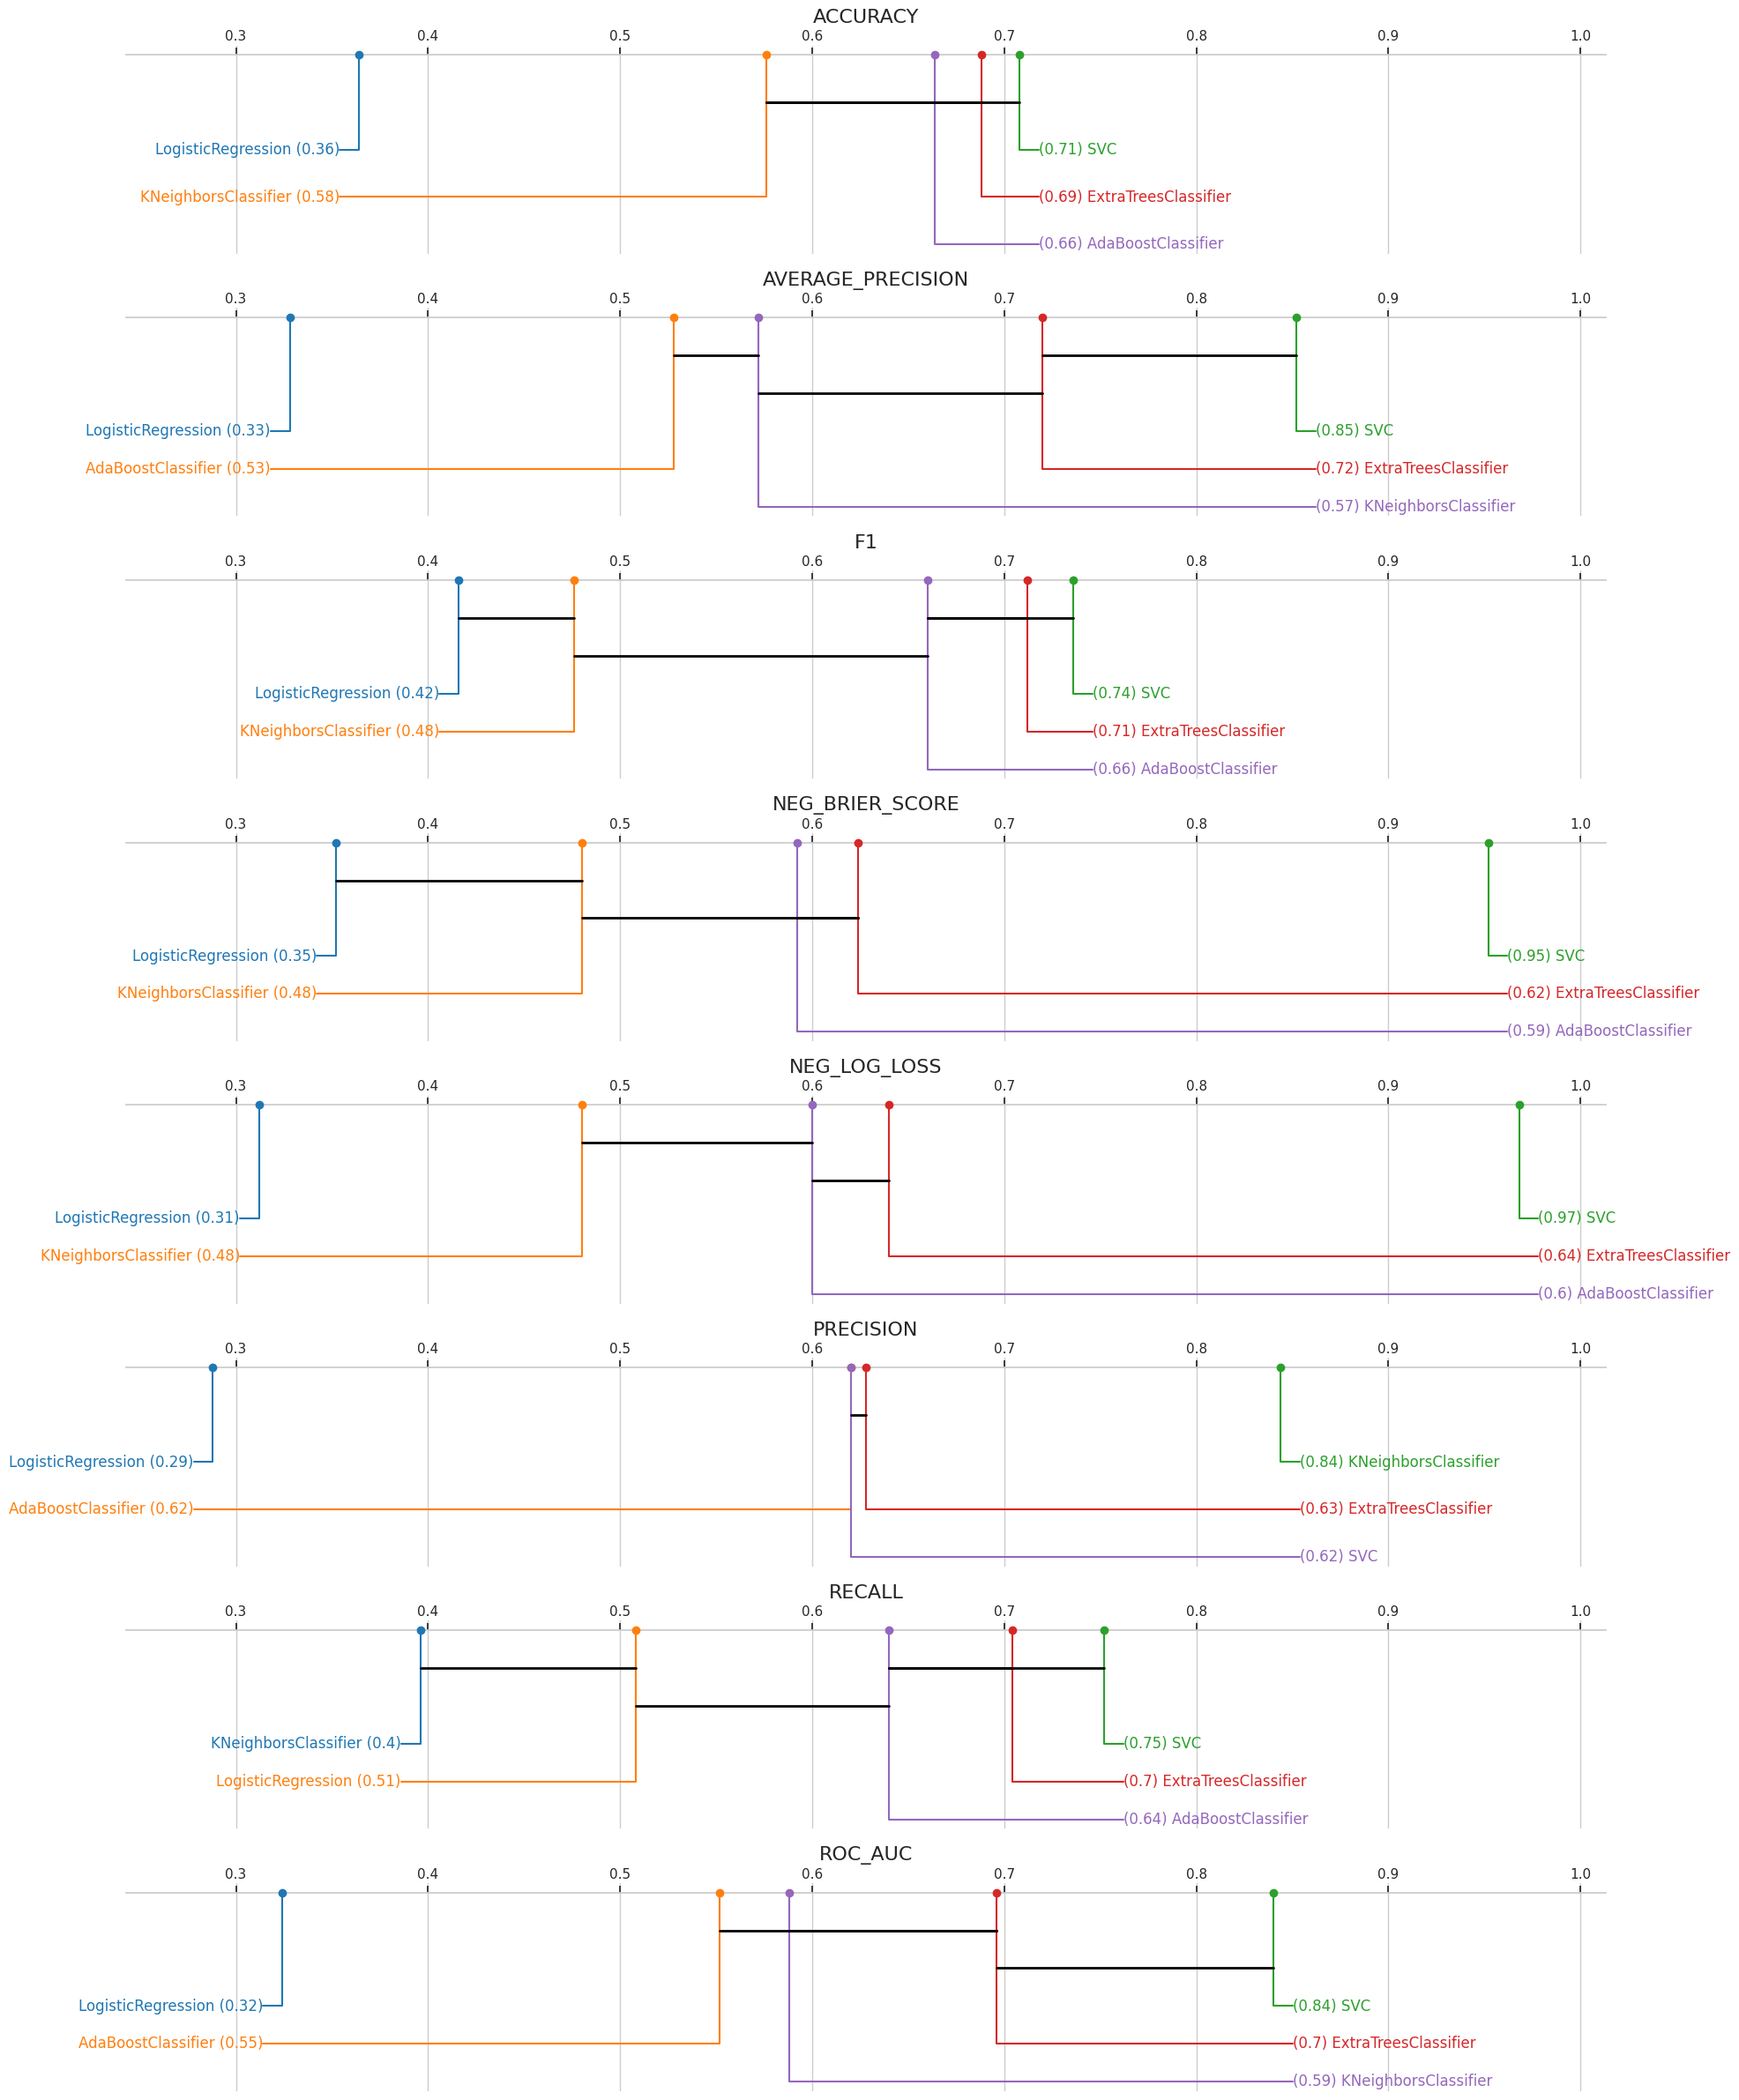

In [3]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result)

In [5]:
display(pc_results["accuracy"])

,AdaBoostClassifier,ExtraTreesClassifier,KNeighborsClassifier,LogisticRegression,SVC
AdaBoostClassifier,1.000000,1.000000,0.948399,0.000814,1.000000
ExtraTreesClassifier,1.000000,1.000000,0.666355,0.000272,1.000000
KNeighborsClassifier,0.948399,0.666355,1.000000,0.035748,0.464965
LogisticRegression,0.000814,0.000272,0.035748,1.000000,0.000106
SVC,1.000000,1.000000,0.464965,0.000106,1.000000


In [8]:
display(rank["accuracy"])

method
AdaBoostClassifier      0.664
ExtraTreesClassifier    0.688
KNeighborsClassifier    0.576
LogisticRegression      0.364
SVC                     0.708
dtype: float64

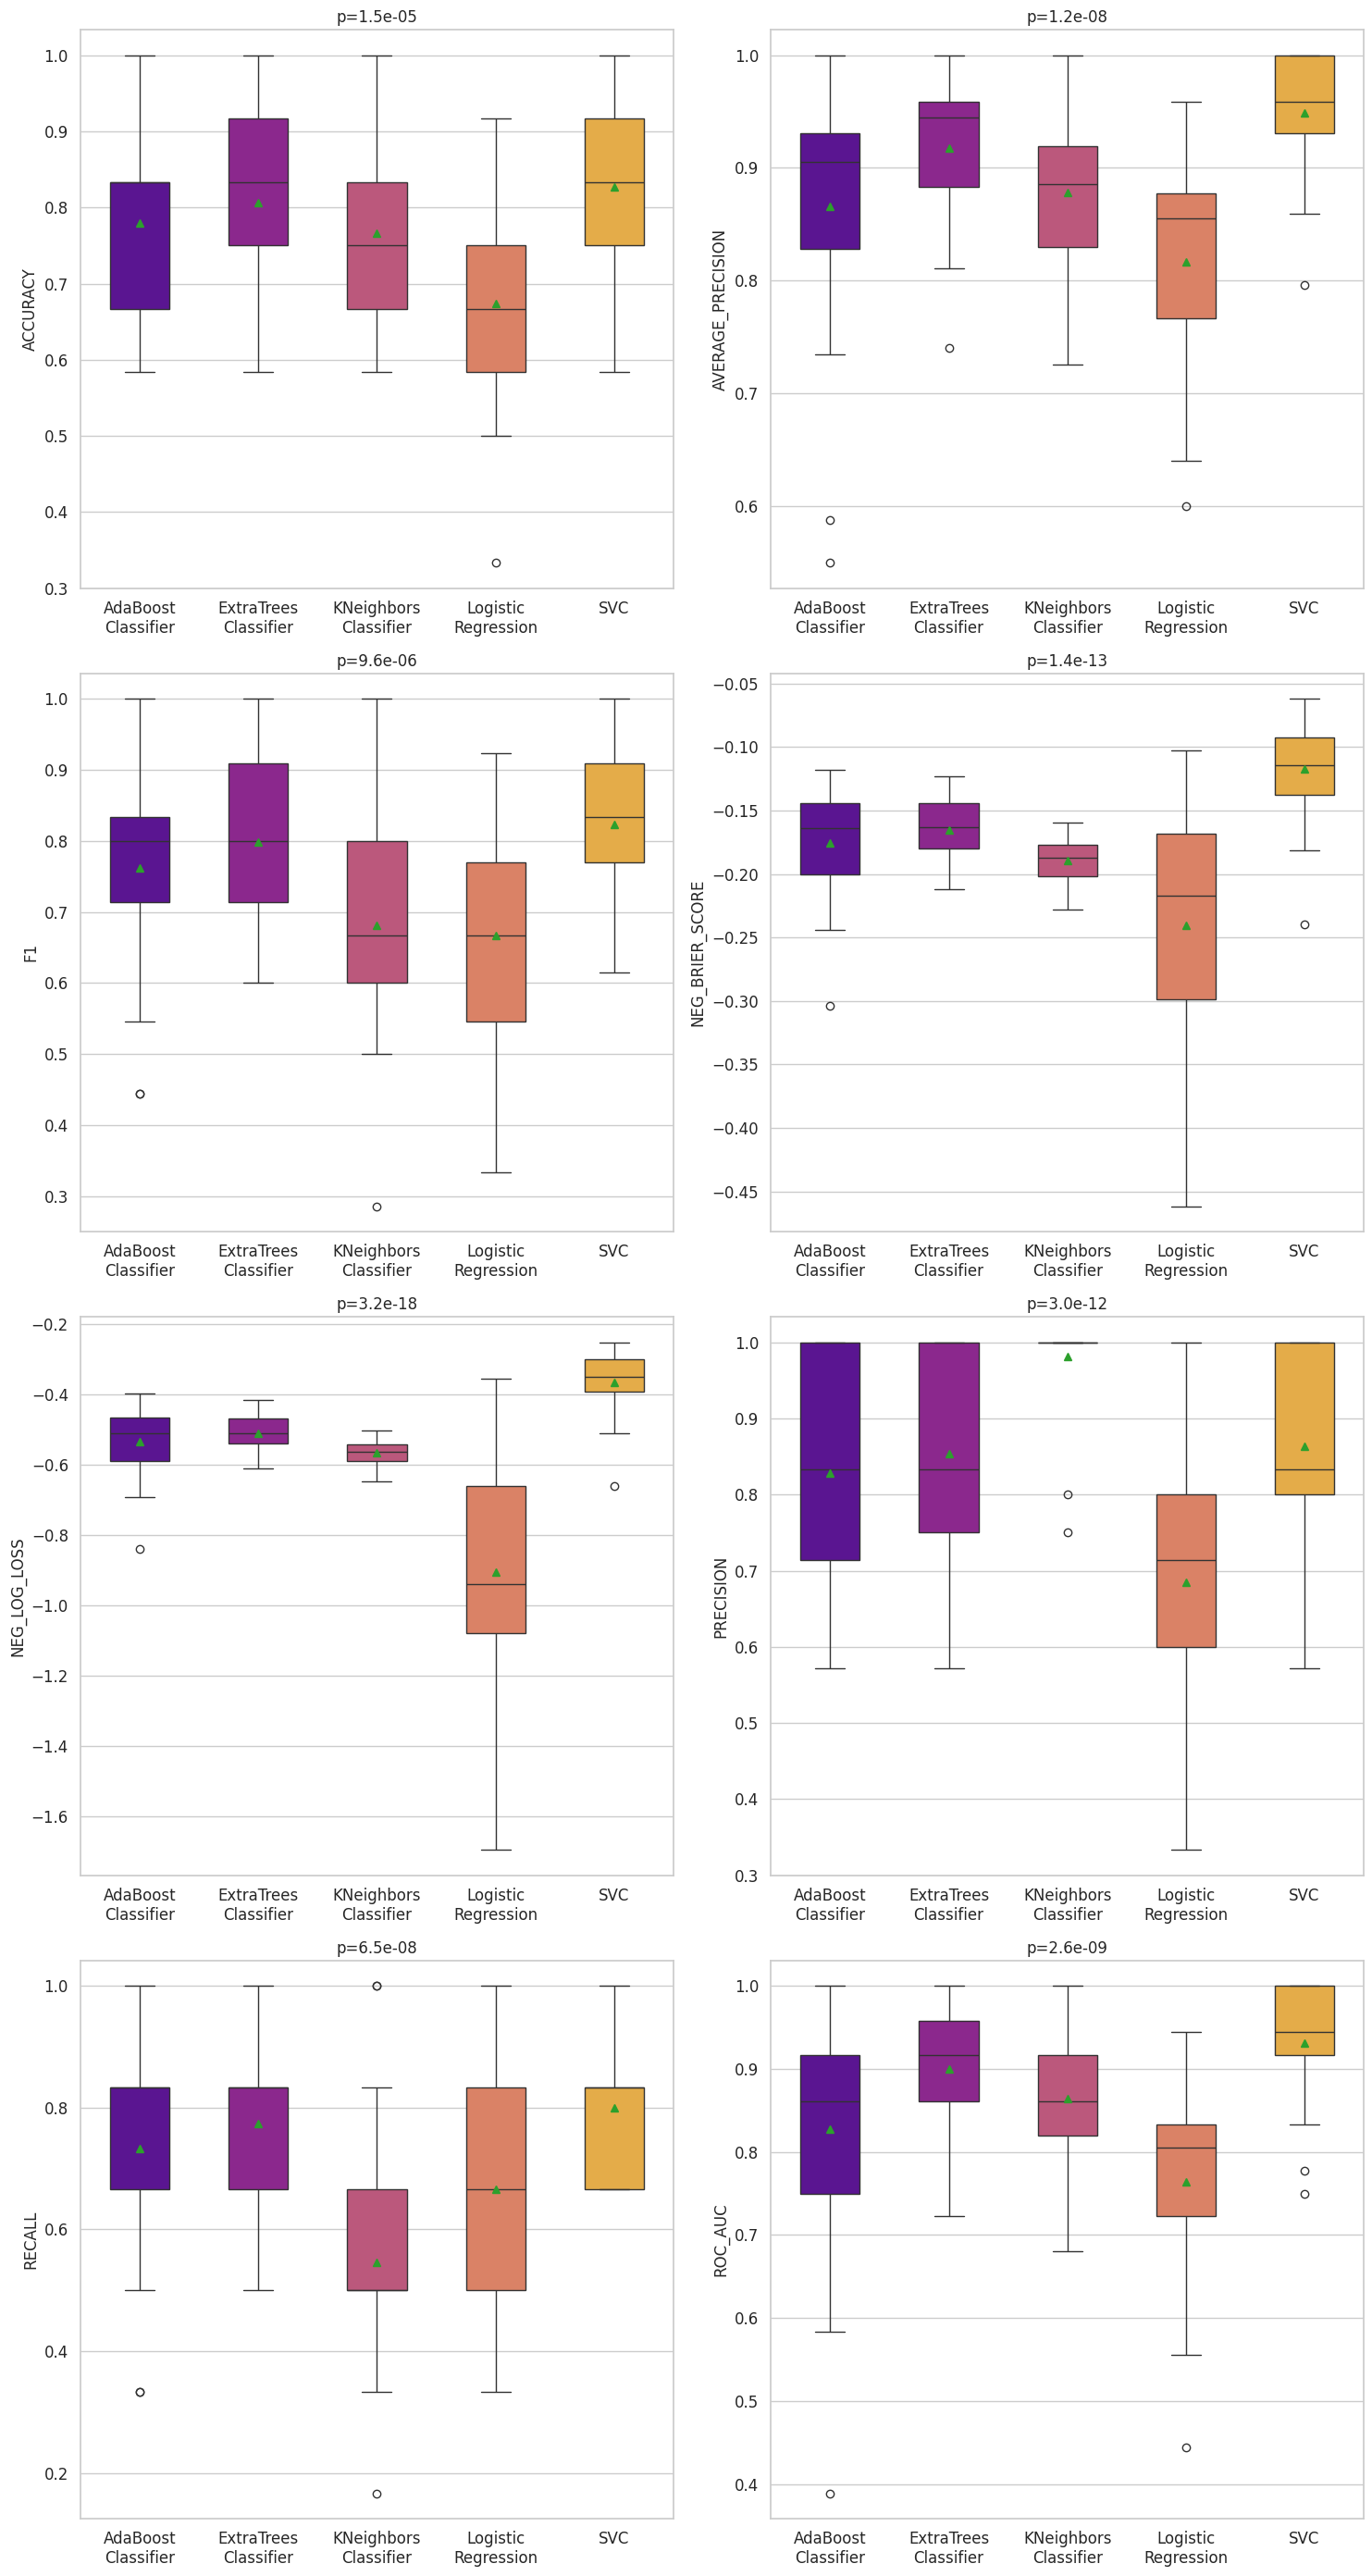

In [2]:
StatisticalAnalysis.test(report_df=cv_result, showmeans=True)

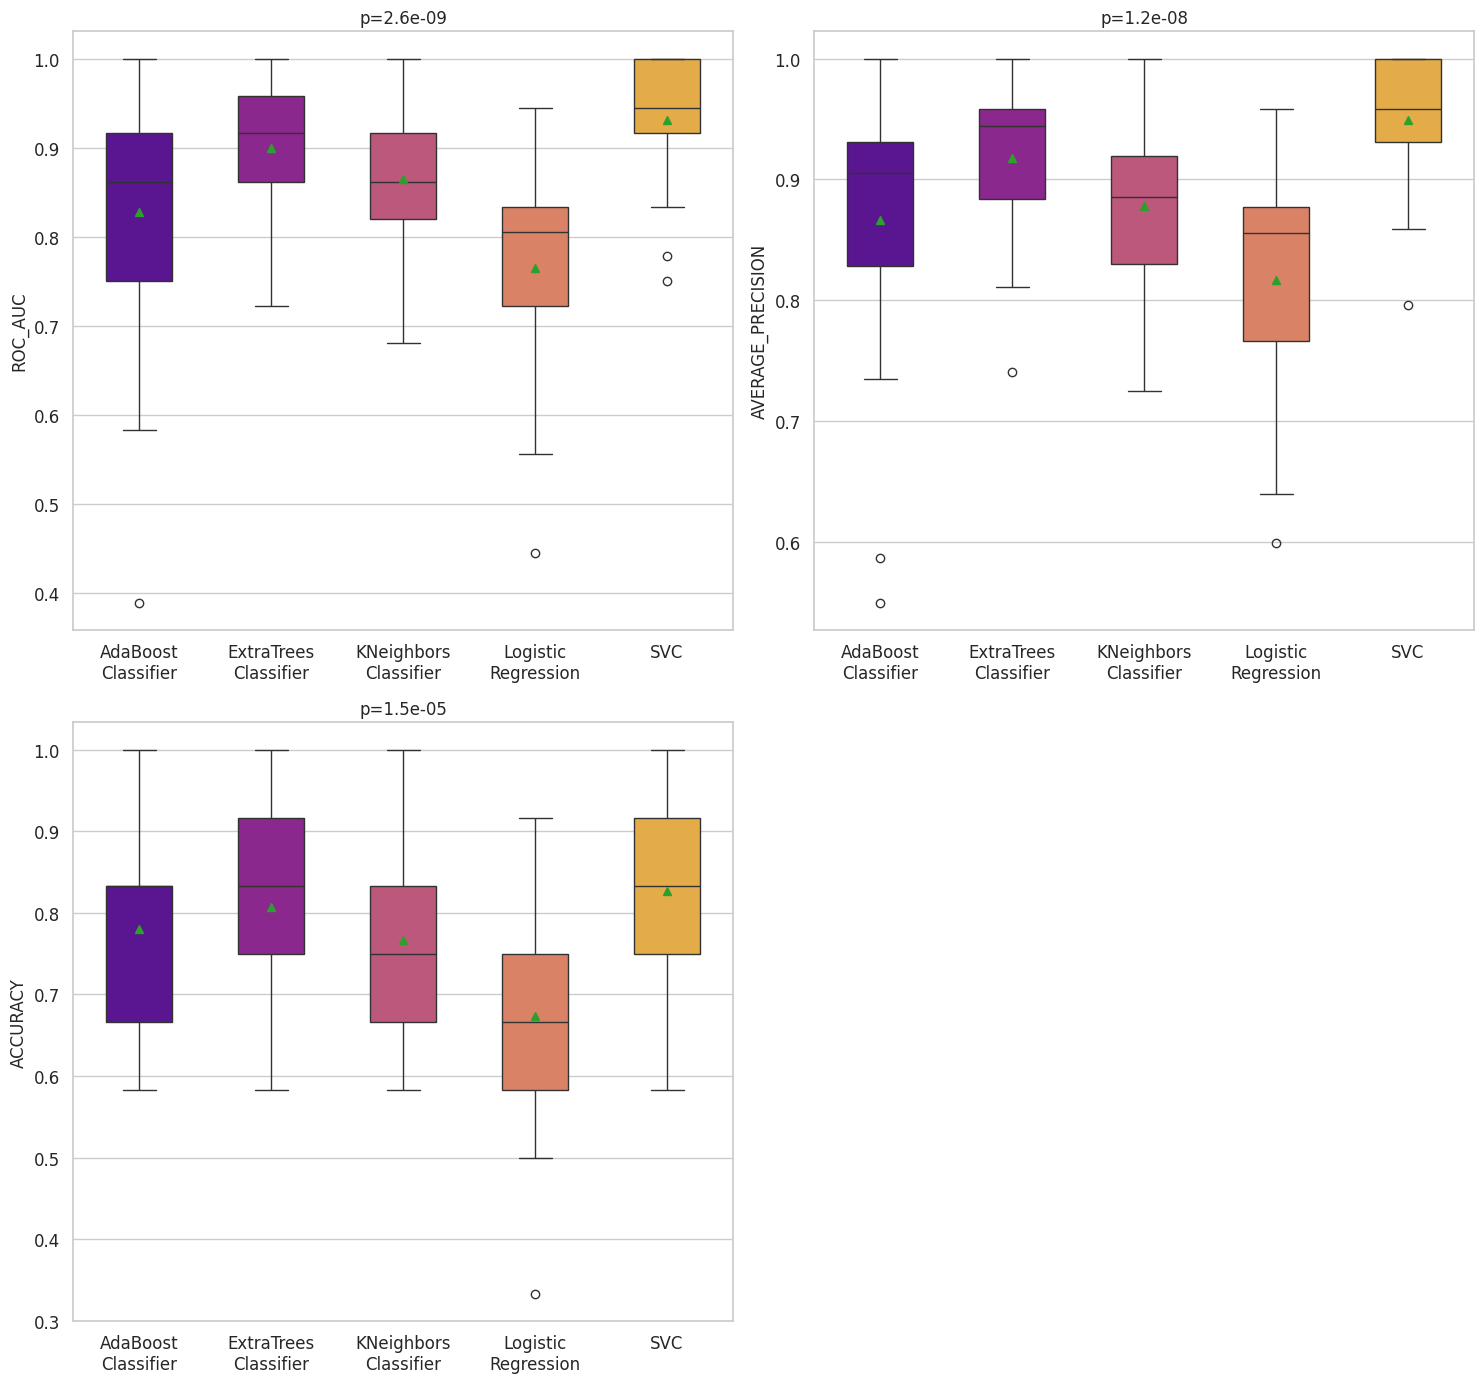

In [3]:
StatisticalAnalysis.test(report_df=cv_result, scoring_list=scoring_list2)

In [2]:
var = StatisticalAnalysis.check_variance_homogeneity(report_df=cv_result)
display(var)

,variance_fold_difference,p_value
scoring,,
accuracy,1.828889,3.789878e-01
average_precision,5.267232,5.855015e-02
f1,2.398156,5.979418e-01
neg_brier_score,31.724071,1.146388e-07
neg_log_loss,108.077604,1.015795e-13
precision,5.987628,1.792446e-06
recall,2.920000,4.016213e-01
roc_auc,4.225930,6.821683e-02


In [3]:
var2 = StatisticalAnalysis.check_variance_homogeneity(report_df=cv_result, scoring_list=scoring_list2)
display(var2)

,variance_fold_difference,p_value
scoring,,
roc_auc,4.225930,0.068217
average_precision,5.267232,0.058550
accuracy,1.828889,0.378988


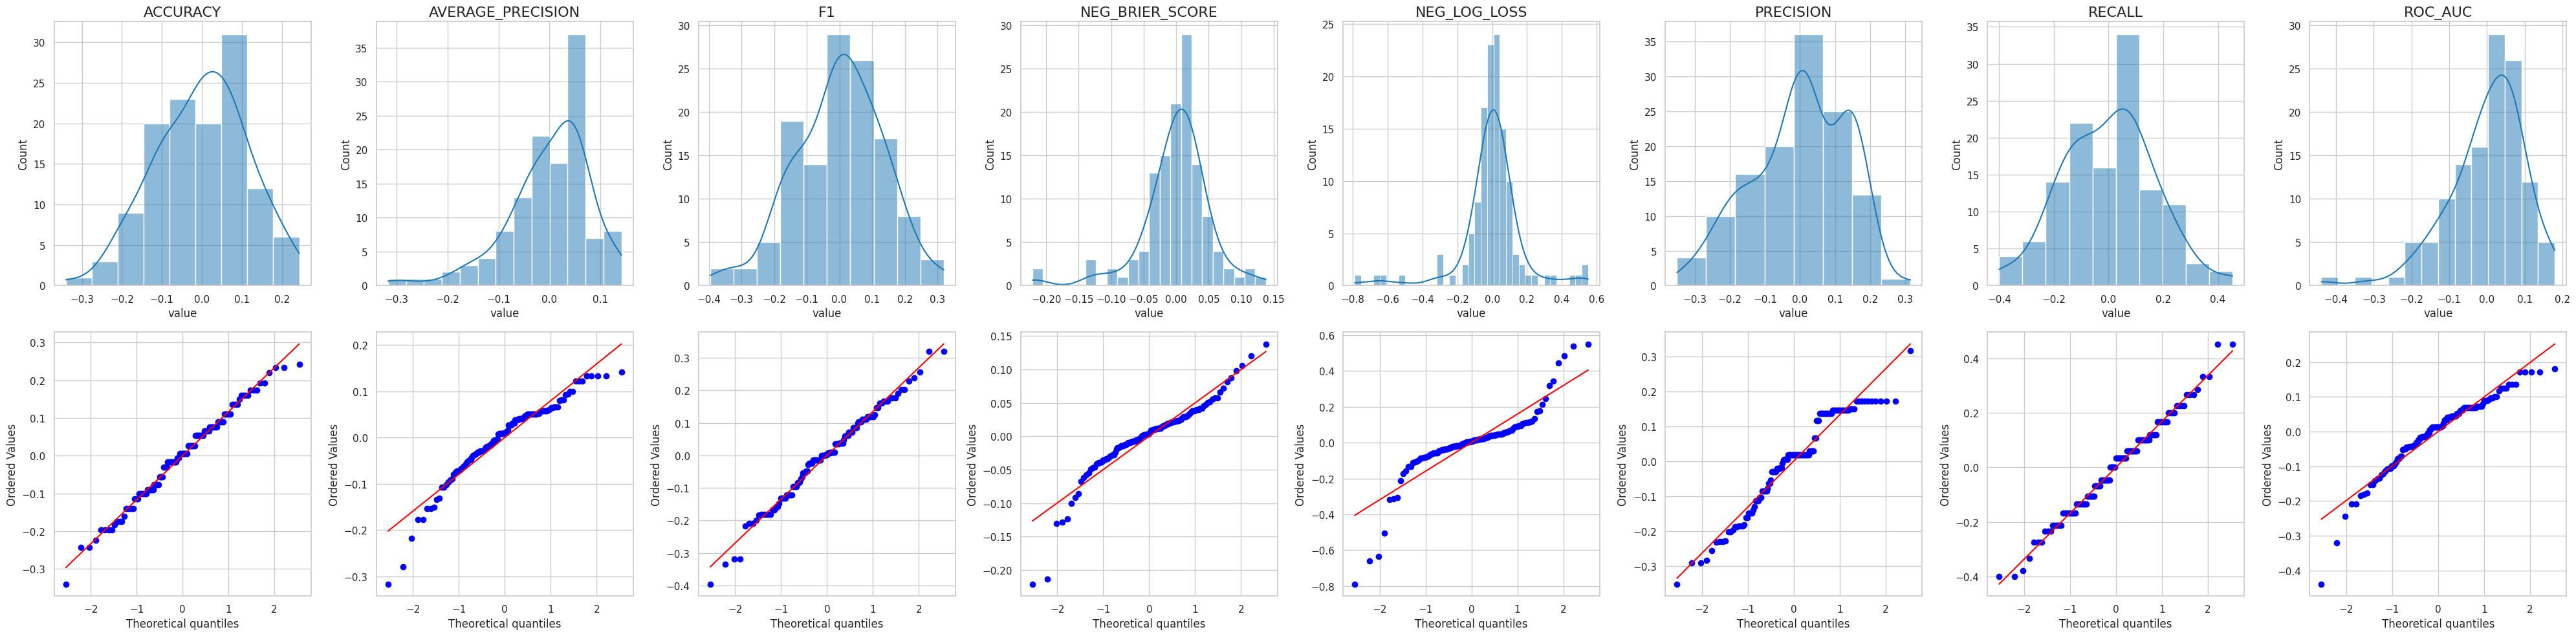

In [ ]:
StatisticalAnalysis.check_normality(report_df=cv_result)

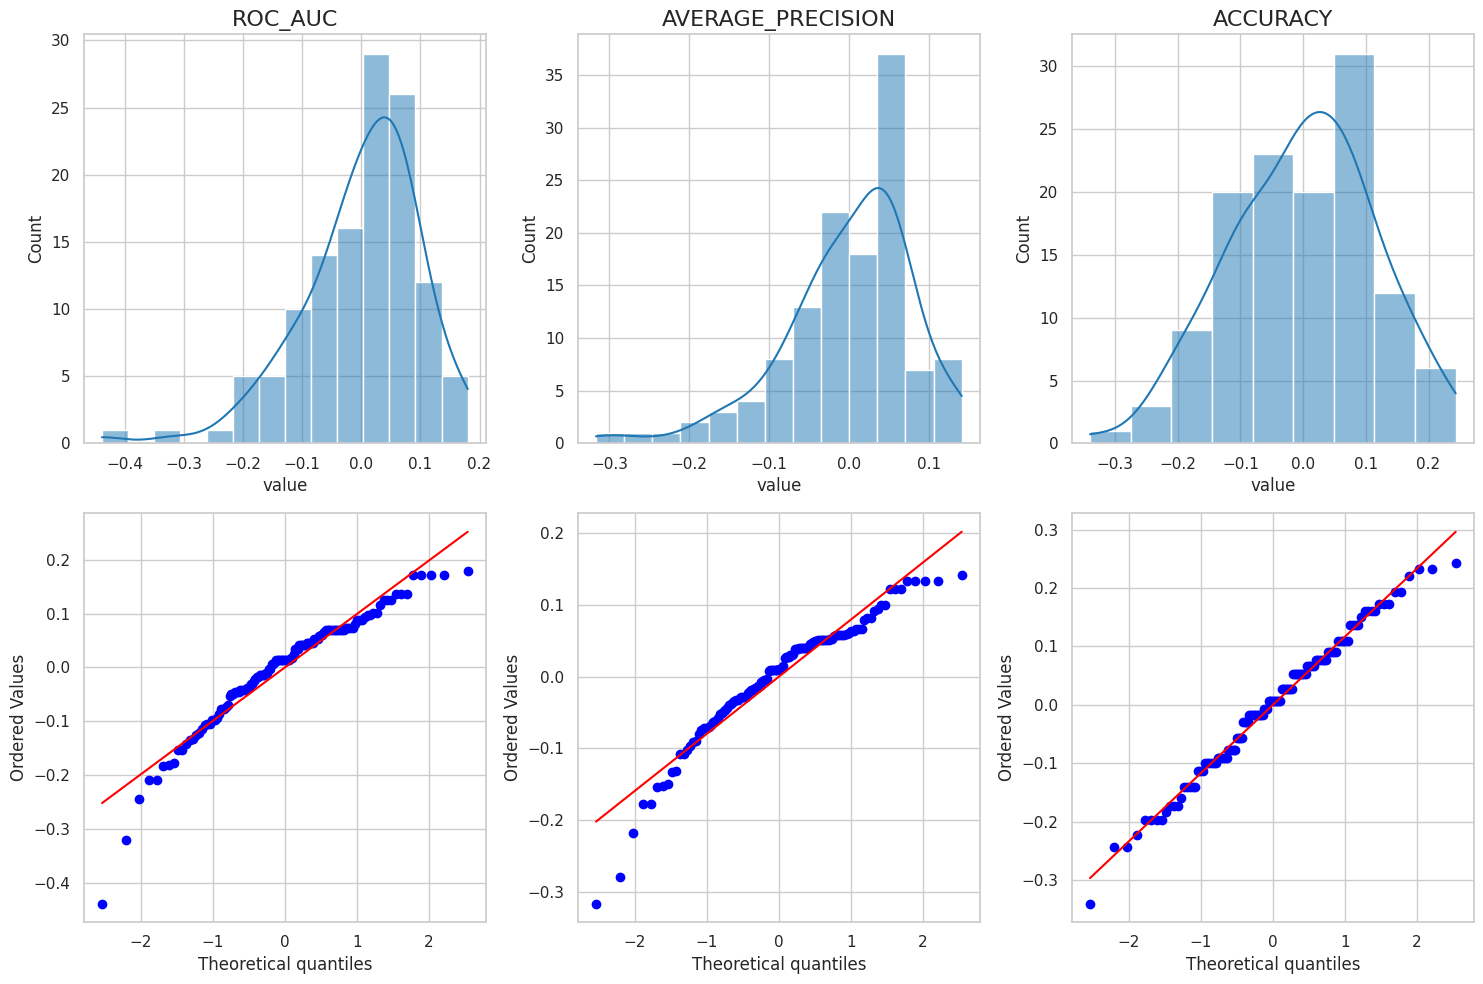

In [4]:
StatisticalAnalysis.check_normality(report_df=cv_result, scoring_list=scoring_list2)

KeyError: 'scoring'

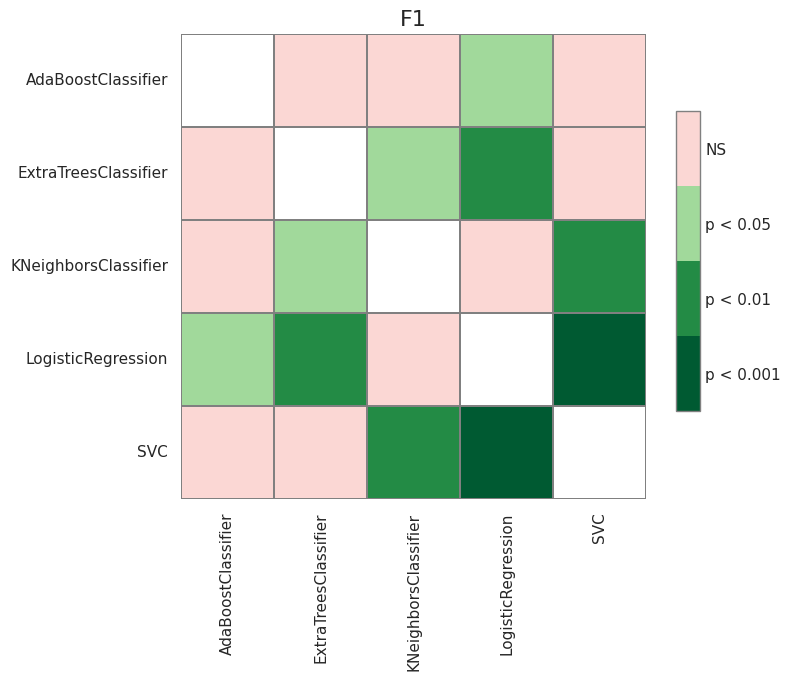

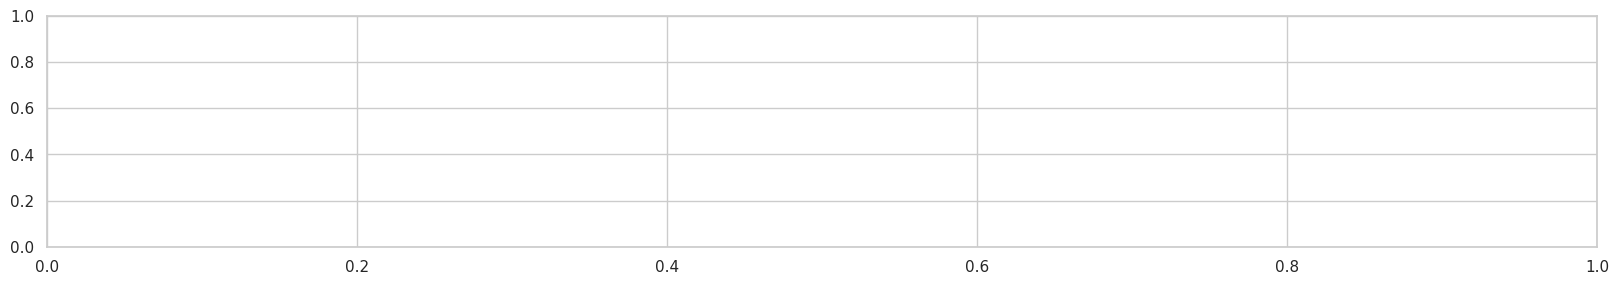

In [3]:
pc_results = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list="f1")

In [7]:
display(pc_results["f1"])

,AdaBoostClassifier,ExtraTreesClassifier,KNeighborsClassifier,LogisticRegression,SVC
AdaBoostClassifier,1.000000,1.000000,0.094440,0.014458,1.000000
ExtraTreesClassifier,1.000000,1.000000,0.017055,0.001972,1.000000
KNeighborsClassifier,0.094440,0.017055,1.000000,1.000000,0.008541
LogisticRegression,0.014458,0.001972,1.000000,1.000000,0.000710
SVC,1.000000,1.000000,0.008541,0.000710,1.000000


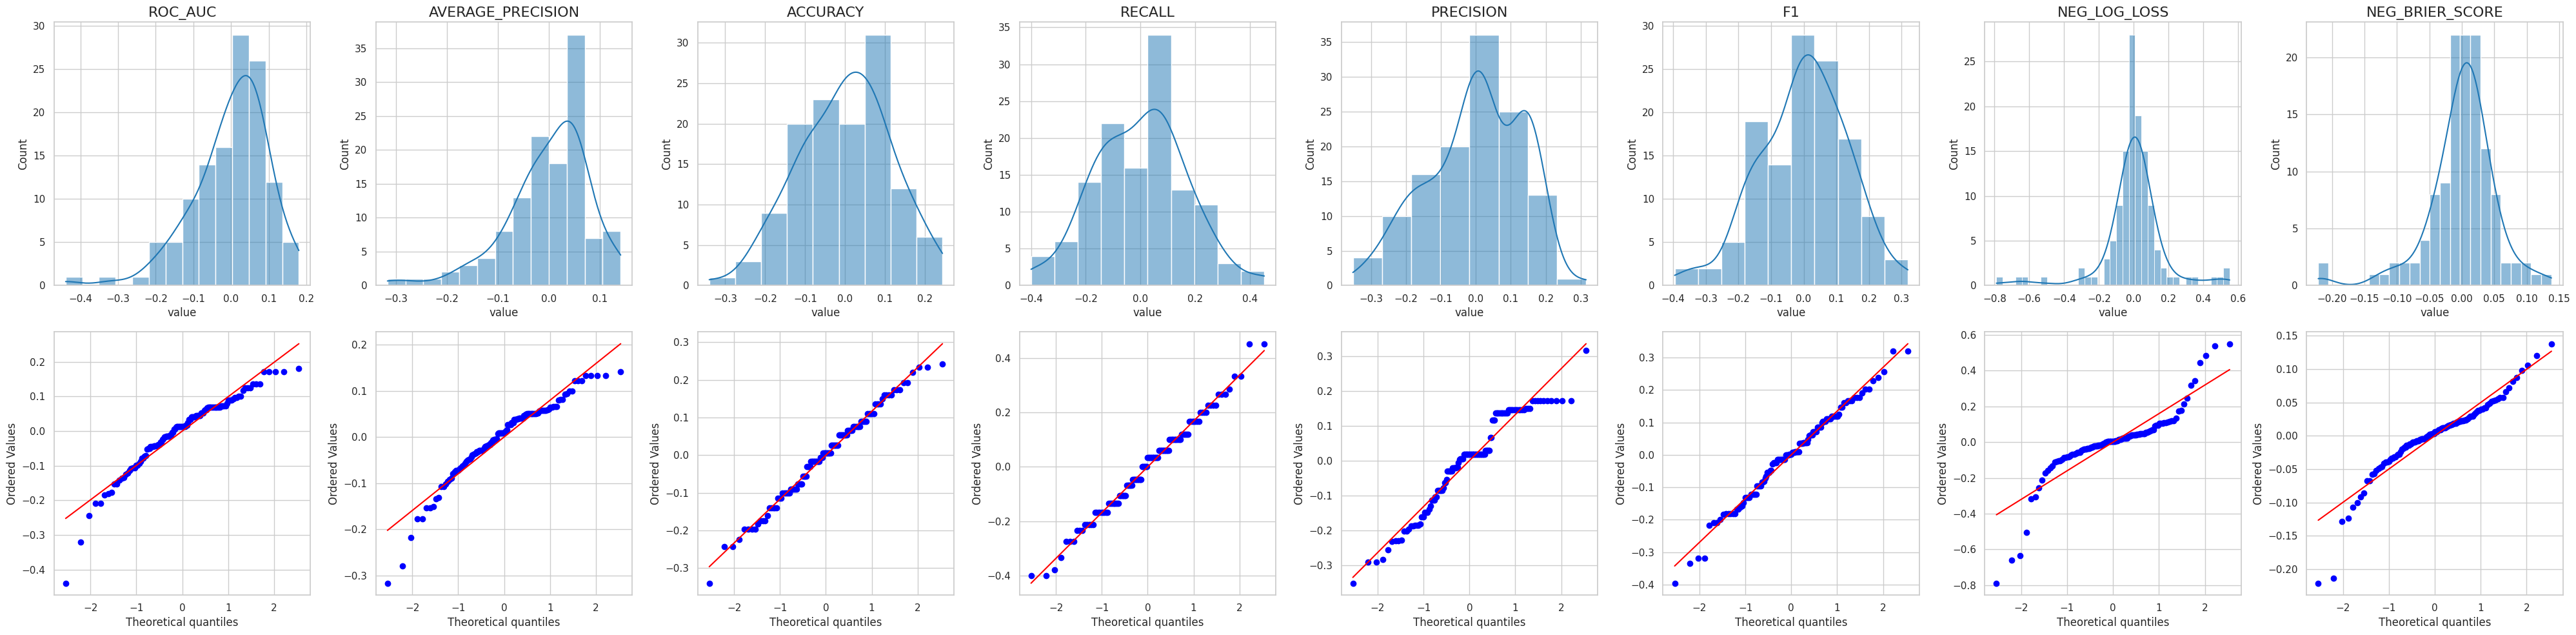

In [9]:
normal_report = StatisticalAnalysis.check_normality(report_long, scoring_list=scoring_list)

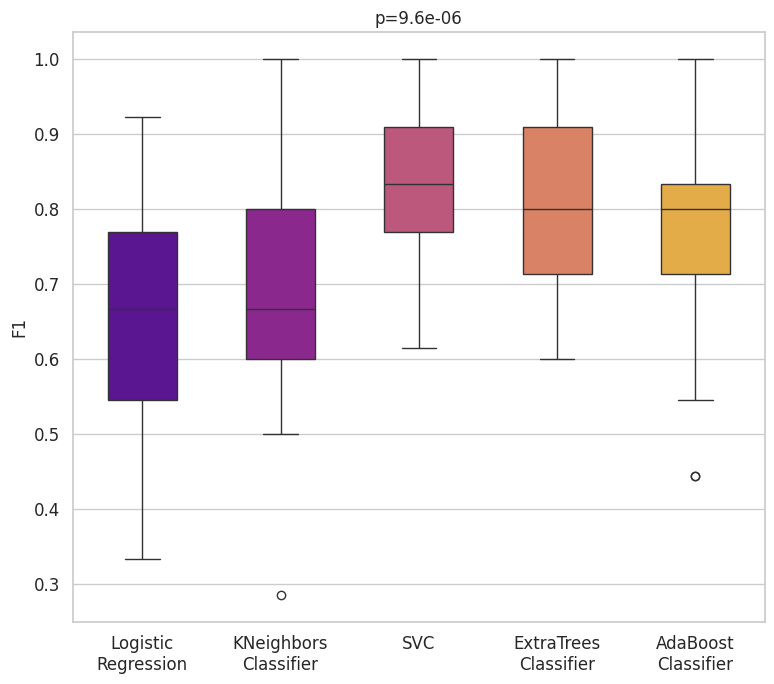

In [10]:
StatisticalAnalysis.test(report_long, scoring_list=["f1"])

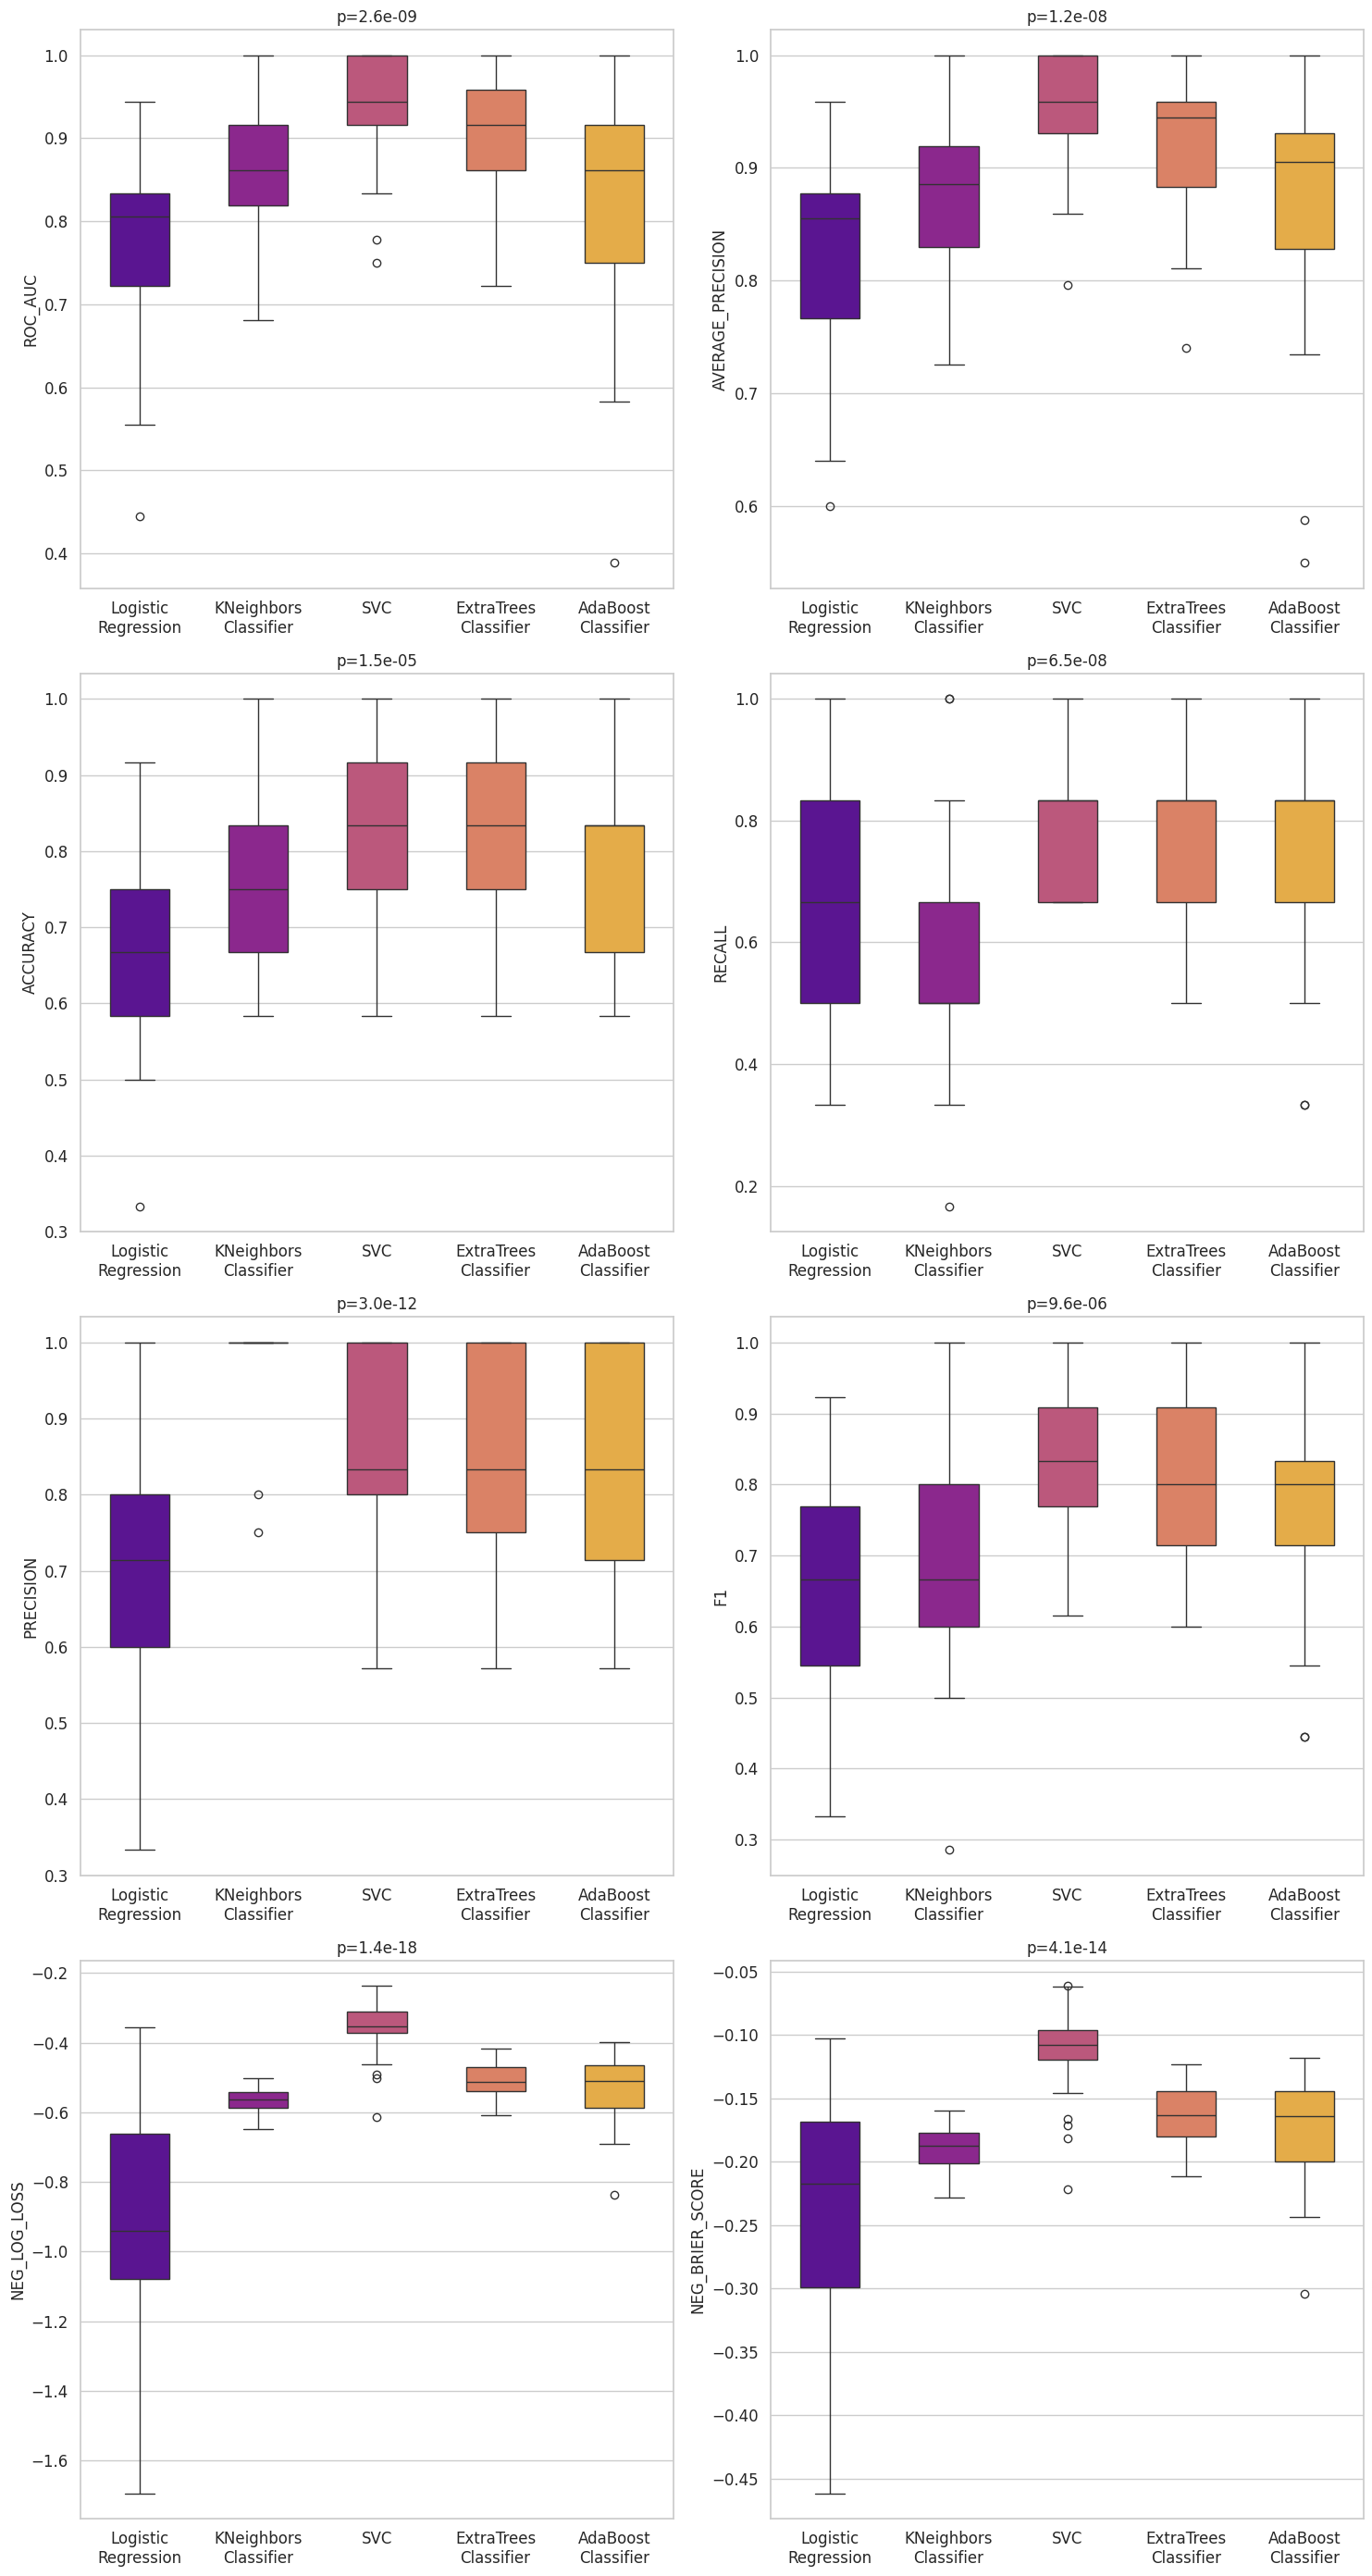

In [11]:
StatisticalAnalysis.test(report_long)